In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Advanced Learning Algorithms/Week 1/optional-labs


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Advanced Learning Algorithms/Week 1/optional-labs


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# **Loading Dataset**

In [ ]:
X_train = np.array([[1.0], [2.0]])                    #size in 1000 square feet
y_train = np.array([[300.0], [500.0]])                #price in 1000s of dollars

## *Plotting Data*

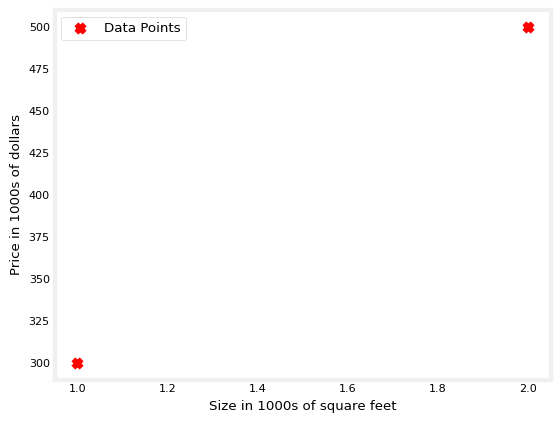

In [ ]:
fig, ax = plt.subplots(1,1)
ax.scatter(X_train, y_train, marker = 'x', c = 'r', label = "Data Points")
ax.legend(fontsize = 'large')
ax.set_xlabel('Size in 1000s of square feet')
ax.set_ylabel('Price in 1000s of dollars')
plt.show()

In [ ]:
print(f"X Shape: {X_train.shape}, X Type: {type(X_train)}")

X Shape: (2, 1), X Type: <class 'numpy.ndarray'>


## *Linear Model*

In [ ]:
linear_layer = Dense(units=1, activation = 'linear', )


### Initializing Activation

In [ ]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[0.62]], shape=(1, 1), dtype=float32)


In [ ]:
w, b = linear_layer.get_weights()
print(f'w = {w}, b = {b}')

w = [[0.62]], b = [0.]


### Setting Custom Weights

In [35]:
set_w = np.array([[200]])   #w should be a 2D numpy array
set_b = np.array([100])     #b should be a 1D numpy array

linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


###Comparison

In [37]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

a1in = np.dot(set_w, X_train[0].reshape(1,1)) + set_b
print(a1in)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


### Predictions

In [38]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, set_w) + set_b

*Plotting Predictions*

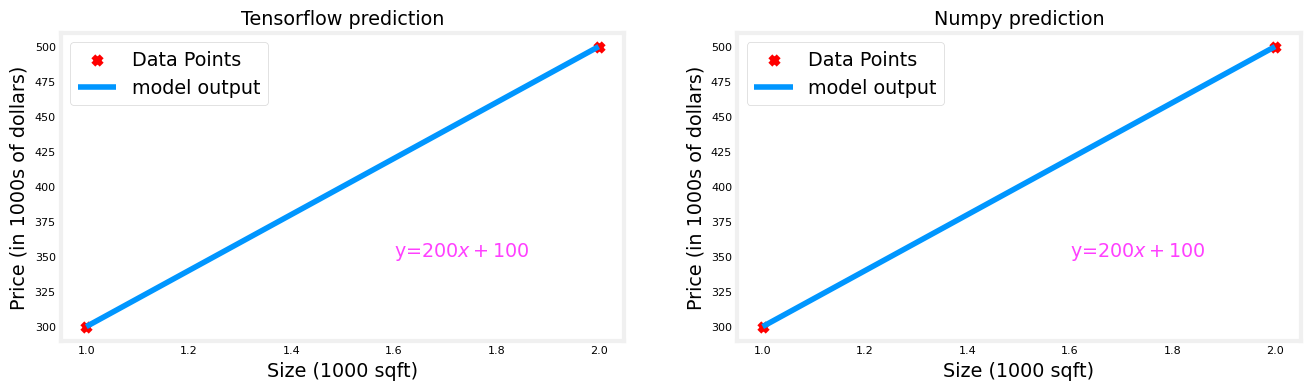

In [39]:
plt_linear(X_train, y_train, prediction_tf, prediction_np)

# **Neuron with Sigmoid Activation**

## *Dataset*

In [43]:
X_train = np.array([0., 1., 2., 3., 4., 5.], dtype = np.float32).reshape(-1, 1)
Y_train = np.array([0., 0., 0., 1., 1., 1.], dtype = np.float32).reshape(-1, 1)

In [44]:
pos = Y_train == 1
neg = Y_train == 0

X_train[pos]

array([3., 4., 5.], dtype=float32)

## *Data Visualization*

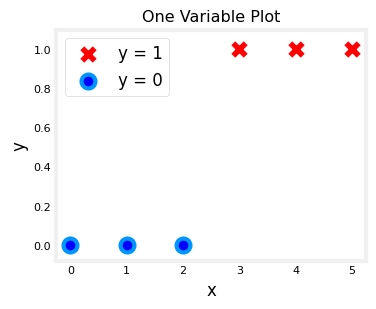

In [48]:
fig, ax = plt.subplots(1,1, figsize = (4,3))
ax.scatter(X_train[pos], Y_train[pos], marker = 'x', c = 'red', s = 80, label = 'y = 1')
ax.scatter(X_train[neg], Y_train[neg], marker = 'o', c = 'blue', s = 100, label = 'y = 0', facecolors = 'none', edgecolors = dlc['dlblue'], lw = 3)
ax.set_ylim(-0.08, 1.1)
ax.set_ylabel('y', fontsize = 12)
ax.set_xlabel('x', fontsize = 12)
ax.legend(fontsize = 12)
ax.set_title('One Variable Plot')
plt.show()

## *Logistic Neuron*

In [49]:
model = Sequential(
    [
        Dense(1, input_dim = 1, activation = 'sigmoid', name = 'L1')            ###First 1 means that the output has one neuron or the final prediction is a single number.
    ]                                                                           ###input_dim = 1 means the input has just one feature
)                                                                               ###activation = 'sigmoid' means the result is passed through a sigmoid function to map it to the range [0,1]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
logistic_layer = model.get_layer('L1')
w, b = logistic_layer.get_weights()
print(f'w = {w}, b = {b}')
print(w.shape, b.shape)

w = [[1.43]], b = [0.]
(1, 1) (1,)


In [55]:
set_w = np.array([[2]])
set_b = np.array([-4.5])

logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [56]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
[[0.01]]
[[0.01]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

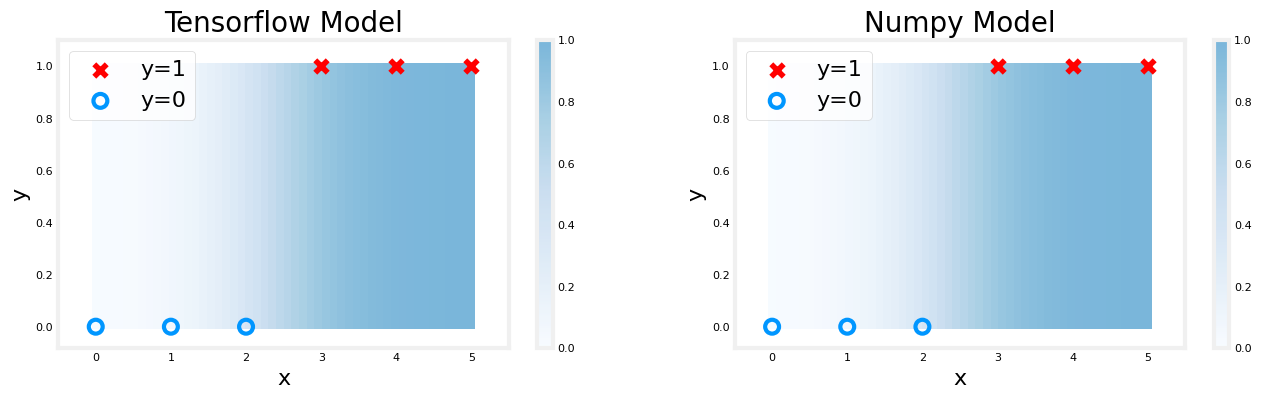

In [57]:
plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg)

### **PRACTICE MODEL**

In [59]:
X_train = np.array([[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]], dtype=float)
Y_train = np.array([[0], [0], [0], [0], [0], [1], [1], [1], [1], [1]], dtype=float)

In [60]:
model = Sequential(
    [
        Dense(units = 1, input_dim = 1, activation = 'sigmoid')
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.compile(optimizer = 'adam',
              loss = BinaryCrossentropy(),
              metrics = ['accuracy'])

In [63]:
model.fit(X_train, Y_train, epochs = 1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step - accuracy: 0.5000 - loss: 1.0087
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4000 - loss: 1.0061
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4000 - loss: 1.0036
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4000 - loss: 1.0011
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4000 - loss: 0.9987
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4000 - loss: 0.9962
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4000 - loss: 0.9937
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4000 - loss: 0.9912
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4000 - loss: 0.9888
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4000 - loss: 0.9863
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4000 - loss: 0.9839
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy

In [64]:
predictions = model.predict(X_train)
print("Predicted probabilities:\n", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted probabilities:
 [[0.31]
 [0.38]
 [0.46]
 [0.53]
 [0.6 ]
 [0.67]
 [0.74]
 [0.79]
 [0.84]
 [0.87]]
